# WHITE WINE QUALITY PREDICTION

### Link to the Dataset: [White Wine Quality](https://www.kaggle.com/piyushagni5/white-wine-quality)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing  
from sklearn import metrics
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

# making predictions using different classifiers
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Getting our Data

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Kaggle+HE\Github GSSoC21\NeoAlgo\whitewinequality.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Data Preprocessing

In [3]:
# checking for null values
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# checking variance
variables = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,92.861483,fixed acidity
1,9.730569,volatile acidity
2,10.007114,citric acid
3,3.830272,residual sugar
4,6.497448,chlorides
5,9.261556,free sulfur dioxide
6,24.980802,total sulfur dioxide
7,1056.497431,density
8,609.861725,pH
9,20.527123,sulphates


In [6]:
# dropping all columns having vif>10
df = df.drop(['fixed acidity','citric acid','total sulfur dioxide','density','pH','sulphates','alcohol'], axis = 1)
df

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,quality
0,0.27,20.7,0.045,45.0,6
1,0.30,1.6,0.049,14.0,6
2,0.28,6.9,0.050,30.0,6
3,0.23,8.5,0.058,47.0,6
4,0.23,8.5,0.058,47.0,6
...,...,...,...,...,...
4893,0.21,1.6,0.039,24.0,6
4894,0.32,8.0,0.047,57.0,5
4895,0.24,1.2,0.041,30.0,6
4896,0.29,1.1,0.022,20.0,7


In [7]:
# removing all outliners
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,quality
0,0.27,20.7,0.045,45.0,6
1,0.30,1.6,0.049,14.0,6
2,0.28,6.9,0.050,30.0,6
3,0.23,8.5,0.058,47.0,6
4,0.23,8.5,0.058,47.0,6
...,...,...,...,...,...
4893,0.21,1.6,0.039,24.0,6
4894,0.32,8.0,0.047,57.0,5
4895,0.24,1.2,0.041,30.0,6
4896,0.29,1.1,0.022,20.0,7


### Data Visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

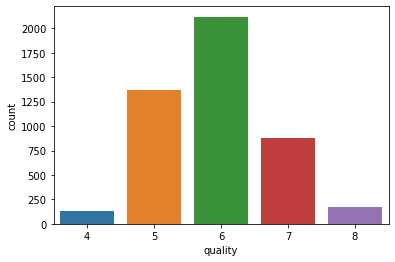

In [8]:
# checking the distribution of outcomes
sns.countplot(x = 'quality', data = df)

In [9]:
# so there are 5 classes under which the quality of white wine is classified

### Splitting Data for Training and Testing

In [10]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

### Making Predictions using KNN

In [11]:
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier1.fit(X_train, y_train) 
y_pred1 = classifier1.predict(X_test)
                                   
# Accuracy
print('Accuracy:', classifier1.score(X_test, y_test))                               

Accuracy: 0.4683815648445874


### Making Predictions using Support Vector Machines

In [12]:
classifier2 = SVC(kernel='linear', random_state=0)    
classifier2.fit(X_train, y_train) 
y_pred2 = classifier2.predict(X_test)
                                   
# Accuracy
print('Accuracy:', classifier2.score(X_test, y_test))    

Accuracy: 0.45444801714898175


### Making Predictions using Decision Trees

In [13]:
classifier3 = DecisionTreeClassifier(random_state=0)    
classifier3.fit(X_train, y_train) 
y_pred3 = classifier3.predict(X_test)
                                   
# Accuracy
print('Accuracy:', classifier3.score(X_test, y_test))    

Accuracy: 0.5830653804930332


### Making Predictions using Random Forest Classifier

In [14]:
classifier4 = RandomForestClassifier(random_state=0)  
classifier4.fit(X_train, y_train) 
y_pred4 = classifier4.predict(X_test)

# Accuracy
print('Accuracy:', classifier4.score(X_test, y_test))

Accuracy: 0.639871382636656


### Making Predictions using Naive Bayes

In [15]:
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train) 
y_pred5 = classifier5.predict(X_test)

# Accuracy
print('Accuracy:', classifier5.score(X_test, y_test))

Accuracy: 0.4833869239013934


# Random Forest Classifier is the most accurate model. Predictions are 63.98% accurate.

### Cross Validation for boosting Accuracy

In [16]:
# performing k-fold cross validation

In [17]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

Train: [ 857  858  864 ... 4659 4660 4661] Validation: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  

In [18]:
y_pred_f = classifier4.predict(X_test)

# Accuracy
print('New Accuracy:', classifier4.score(X_test, y_test))

New Accuracy: 0.9356223175965666


# Final predictions are 93.56% accurate.

### Results' Visualization

In [19]:
cm = confusion_matrix(y_test, y_pred_f)
cm

array([[ 25,   2,   0,   0,   0],
       [  0, 254,  19,   0,   1],
       [  0,  13, 401,   8,   1],
       [  0,   2,   8, 165,   0],
       [  0,   3,   1,   2,  27]], dtype=int64)

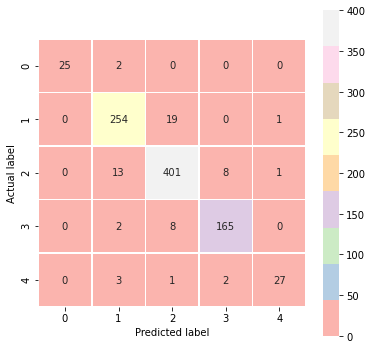

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Classification Report

In [21]:
class_names = ['4','5','6','7','8']
print(classification_report(y_test, y_pred_f, target_names=class_names))

              precision    recall  f1-score   support

           4       1.00      0.93      0.96        27
           5       0.93      0.93      0.93       274
           6       0.93      0.95      0.94       423
           7       0.94      0.94      0.94       175
           8       0.93      0.82      0.87        33

    accuracy                           0.94       932
   macro avg       0.95      0.91      0.93       932
weighted avg       0.94      0.94      0.94       932

